# Exploring datasets

In [24]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [25]:
from tqdm.notebook import tqdm
import time

## trainingData

###  import data

In [26]:
import pandas as pd

In [27]:
trainingData = pd.read_csv('csv/trainingData.csv')
trainingData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


### correlation

In [28]:
def get_correlation(df, threshold):
    '''
    args: dataframe, threshold
    returns dataframe of correlating features
    for given threshold
    '''
    correlation_matrix = df.corr()
    list_corr = []
    for row in correlation_matrix.index:
        for col in list(correlation_matrix.columns):
            if abs(correlation_matrix.loc[row,col]) > threshold and col<row:
                list_corr.append((row,col,correlation_matrix.loc[row,col]))
    return pd.DataFrame(list_corr, columns=['f1','f2','corr'])

In [29]:
high_corr_features = get_correlation(trainingData,0.9)

In [30]:
high_corr_features

,f1,f2,corr
0,WAP016,WAP015,0.901935
1,WAP054,WAP053,0.928291
2,WAP081,WAP080,0.911825
3,WAP102,WAP101,0.907423
4,WAP126,WAP125,0.921016
5,WAP130,WAP129,0.927243
6,WAP135,WAP134,0.914874
7,WAP137,WAP136,0.915606
8,WAP162,WAP161,0.916706
9,WAP167,WAP166,0.914518


### exploring dataset

In [31]:
# how many buildings?
trainingData.BUILDINGID.unique()

array([1, 0, 2], dtype=int64)

In [33]:
# range of rooms
import numpy as np
np.sort(trainingData.SPACEID.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  22,  25,  26,  27,  28,  29,  30, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 146, 147, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 253, 254], dtype=int64)

In [34]:
# rooms 0 Floor
np.sort(trainingData.query('BUILDINGID == 0 & FLOOR == 0').SPACEID.unique())

array([102, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 201, 202, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219,
       220, 222, 224, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235,
       236, 237], dtype=int64)

In [35]:
# rooms 0 Floor
np.sort(trainingData.query('BUILDINGID == 0 & FLOOR == 1').SPACEID.unique())

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 136, 137, 138, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 234,
       235], dtype=int64)

In [36]:
import numpy as np

In [37]:
# how many floors in the building 0 ?
np.sort(trainingData.query('BUILDINGID == 0').FLOOR.unique())

array([0, 1, 2, 3], dtype=int64)

In [38]:
# how many rooms in the building 0 ?
np.sort(trainingData.query('BUILDINGID == 0').SPACEID.unique())

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 241],
      dtype=int64)

In [39]:
# how many floors in the building 1 ?
np.sort(trainingData.query('BUILDINGID == 1').FLOOR.unique())

array([0, 1, 2, 3], dtype=int64)

In [40]:
# how many rooms in the building 1 ?
np.sort(trainingData.query('BUILDINGID == 1').SPACEID.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  22,  25,  26,  27,  28,  29,  30, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 121, 122, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 222, 224, 225, 226, 227, 228, 229, 230, 231, 235, 237, 238,
       239, 243, 244, 245, 246, 247, 248, 249], dtype=int64)

In [41]:
# how many floors in the building 2 ?
np.sort(trainingData.query('BUILDINGID == 2').FLOOR.unique())

array([0, 1, 2, 3, 4], dtype=int64)

In [42]:
# how many rooms in the building 2 ?
np.sort(trainingData.query('BUILDINGID == 2').SPACEID.unique())

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 146, 147, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 250, 253, 254], dtype=int64)

In [43]:
# is every WAP accessible only in one single building?

In [44]:
trainingData.query('BUILDINGID == 0 & WAP001 <=0').WAP001.max()

-93

In [45]:
trainingData.query('BUILDINGID == 1 & WAP001 <=0').WAP001.max()

nan

In [46]:
trainingData.query('BUILDINGID == 2 & WAP001 <=0').WAP001.max()

nan

In [47]:
trainingData.query('BUILDINGID == 3 & WAP001 <=0').WAP001.max()

nan

In [48]:
# Visualize rooms: lat, long for Building, floor, room

In [49]:
trainingData.query('BUILDINGID == 0 & FLOOR == 0').groupby(['SPACEID']).agg({'SPACEID':['count']})

,SPACEID
,count
SPACEID,
102,20
106,10
107,10
110,10
111,20
112,20
113,20
114,19


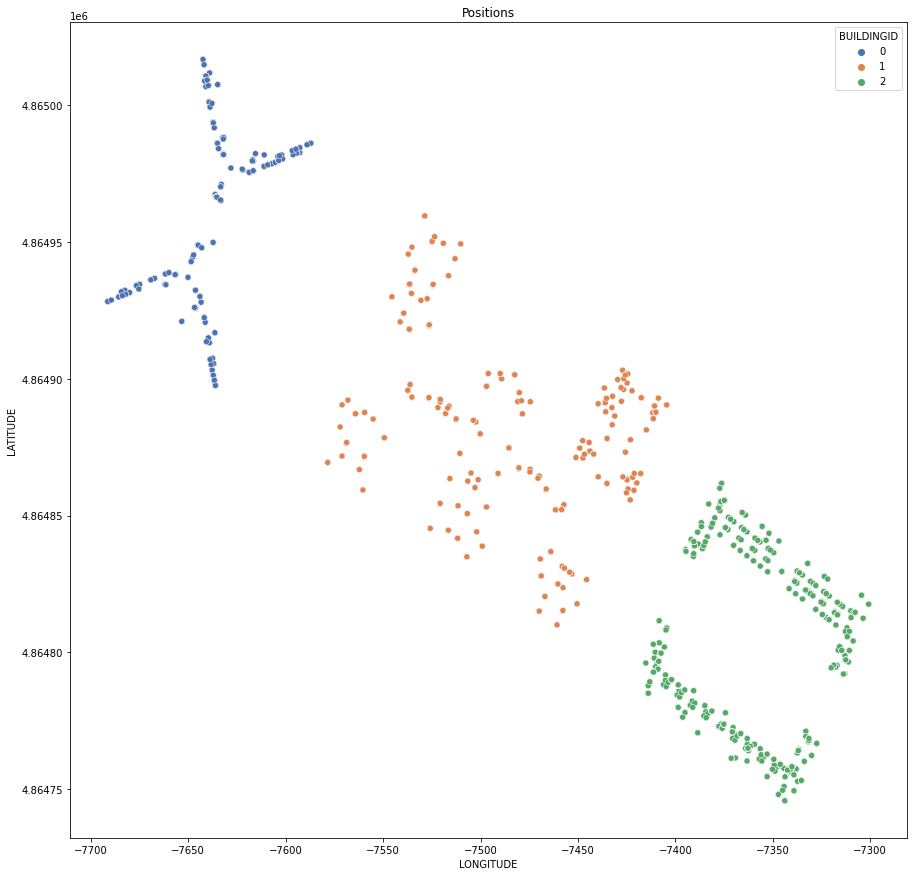

In [51]:
# show all positions of the buildings
import seaborn as sns
import matplotlib.pyplot as plt
data_pos = trainingData
plt.figure(figsize = (15,15))
plt.title("Positions")
plt.xlabel("LONGITUDE")
sns.scatterplot(data = data_pos, x = 'LONGITUDE', y = 'LATITUDE',hue='BUILDINGID',palette='deep')

plt.show()

In [52]:
# range of LONGITUDE
min(trainingData['LONGITUDE']), max(trainingData['LONGITUDE'])

(-7691.338399998844, -7300.818990092725)

In [53]:
# range of LATITUDE
min(trainingData['LATITUDE']), max(trainingData['LATITUDE'])

(4864745.745015971, 4865016.687799998)

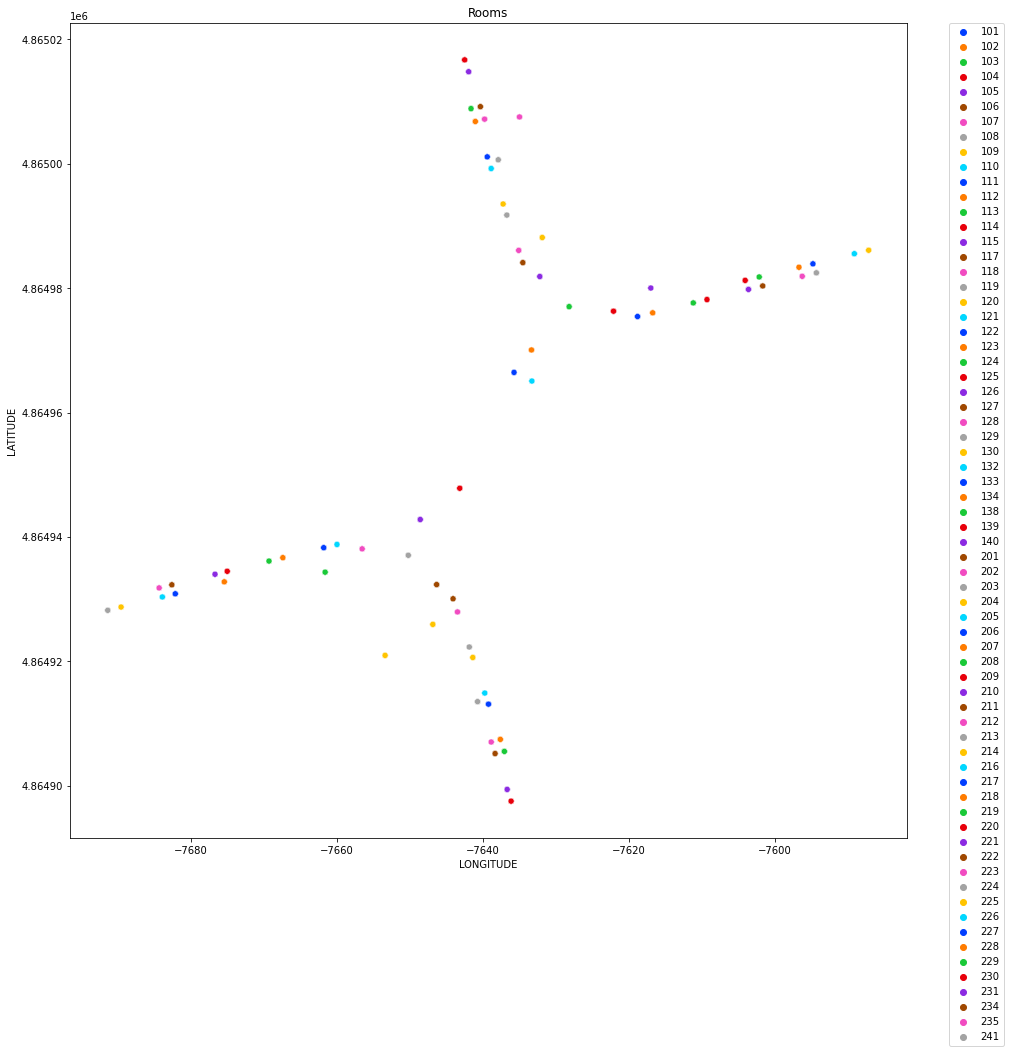

In [54]:
# check given floor and building
bulding = 0
floor = 2
import seaborn as sns
data_pos = trainingData.query('BUILDINGID == @bulding & FLOOR == @floor')
plt.figure(figsize = (15,15))
plt.title("Rooms")
plt.xlabel("LONGITUDE")
# plt.xlim(data_pos['LONGITUDE'].min()-10,data_pos['LONGITUDE'].max()+10)
# plt.ylim(data_pos['LATITUDE'].min()-10,data_pos['LATITUDE'].max()+10)
# plt.ylim(0,900)
sns.scatterplot(data = data_pos, x = 'LONGITUDE', y = 'LATITUDE', hue = 'SPACEID', palette='bright')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## validationData

### import data

In [55]:
validationData = pd.read_csv('csv/validationData.csv')
validationData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,-7317.344231,4.864796e+06,3,2,0,0,0,13,1381156711
1107,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,0,0,0,13,1381156730
1108,100,100,100,100,100,100,100,100,100,100,...,100,-7637.535798,4.864903e+06,0,0,0,0,0,13,1381247781
1109,100,100,100,100,100,100,100,100,100,100,...,100,-7636.654005,4.864905e+06,0,0,0,0,0,13,1381247807


### correlation

In [56]:
# many features have correlation > 0.9!
get_correlation(validationData,0.9)
# Building are situated along the LONGITUDE !

,f1,f2,corr
0,WAP004,WAP003,0.999986
1,WAP022,WAP021,0.999981
2,WAP038,WAP037,0.911497
3,WAP054,WAP053,0.934433
4,WAP093,WAP092,1.000000
5,WAP106,WAP105,0.924768
6,WAP108,WAP107,0.999994
7,WAP120,WAP119,0.933640
8,WAP126,WAP125,0.920073
9,WAP137,WAP136,0.914158


### problem in validation dataset

In [57]:
# BIG PROBLEM: Rooms are not given!!!
np.sort(validationData.SPACEID.unique())

array([0], dtype=int64)

### filling missing SPACEID values using trainData 

In [58]:
X = trainingData[['FLOOR','LONGITUDE','LATITUDE']]
# transform BUILDINGID, FLOOR, SPACEID into single unique value
# this values represents unique position in the building
y = trainingData['BUILDINGID']*10000 + trainingData['FLOOR']*1000 + trainingData['SPACEID']

In [59]:
# split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Scale data to (0,1) range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_sc =  pd.DataFrame(scaler.transform(X_train))
X_train_sc.columns = X.columns
X_test_sc =  pd.DataFrame(scaler.transform(X_test))
X_test_sc.columns = X_test.columns


In [61]:
# using KNeighborsClassifier to predict position in the building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=2)

In [63]:
# create a function to check the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def model_check(y_true, y_pred, model): 
    acc_sc = accuracy_score(y_true, y_pred)
    #recall_sc= recall_score(y_true, y_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(y_true, y_pred))
#     conf_matrix.set_index(model.classes_, inplace=True)
#     conf_matrix.columns = model.classes_
    return conf_matrix, acc_sc

In [64]:
# check on train dataset
con_matr,acc_scor = model_check(y_train, knn.predict(X_train_sc), knn)
acc_scor
# 99% accuracy!

0.9999331193151418

In [65]:
# check on test dataset
con_matr,acc_scor = model_check(y_test, knn.predict(X_test_sc), knn)
acc_scor
# 99% accuracy!

0.9997993981945837

In [66]:
# fixing missing values in validationData
X_val = validationData[['FLOOR','LONGITUDE','LATITUDE']]
X_val_sc =  pd.DataFrame(scaler.transform(X_val))
X_val_sc.columns = X_val.columns
# transform predicted position to SPACEID
validationData['SPACEID'] = (knn.predict(X_val_sc)-
validationData['BUILDINGID']*10000-
validationData['FLOOR']*1000)

In [67]:
validationData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,117,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,102,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,124,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,126,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,203,0,0,2,1380877774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,-7317.344231,4.864796e+06,3,2,136,0,0,13,1381156711
1107,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,136,0,0,13,1381156730
1108,100,100,100,100,100,100,100,100,100,100,...,100,-7637.535798,4.864903e+06,0,0,225,0,0,13,1381247781
1109,100,100,100,100,100,100,100,100,100,100,...,100,-7636.654005,4.864905e+06,0,0,227,0,0,13,1381247807


### exploring dataset

In [68]:
# how many buildings
validationData.BUILDINGID.unique()

array([1, 2, 0], dtype=int64)

In [69]:
# how many buildings?
validationData.BUILDINGID.unique()

array([1, 2, 0], dtype=int64)

In [70]:
# how many floors in the building 0 ?
len(validationData.query('BUILDINGID == 0').FLOOR.unique())

4

In [71]:
# how many rooms in the building 0 ?
len(validationData.query('BUILDINGID == 0').SPACEID.unique())

77

In [72]:
# how many floors in the building 1 ?
len(validationData.query('BUILDINGID == 1').FLOOR.unique())

4

In [73]:
# how many rooms in the building 1 ?
len(validationData.query('BUILDINGID == 1').SPACEID.unique())

56

In [74]:
# how many floors in the building 2 ?
len(validationData.query('BUILDINGID == 2').FLOOR.unique())

5

In [75]:
# how many rooms in the building 2 ?
len(validationData.query('BUILDINGID == 2').SPACEID.unique())

73

In [76]:
import matplotlib.pyplot as plt

(array([536.,   0.,   0.,   0.,   0., 307.,   0.,   0.,   0., 268.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

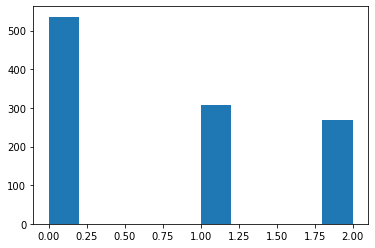

In [77]:
plt.hist(validationData.BUILDINGID)

# Predict BUILDINGID,FLOOR

## drop columns

In [78]:
X_train = trainingData.copy()
X_test = validationData.copy()

In [79]:
# drop irrelevant columns
X_train.drop(columns=['LONGITUDE','LATITUDE','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP','FLOOR','BUILDINGID','SPACEID'],
             inplace=True)
X_test.drop(columns=['LONGITUDE','LATITUDE','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP','FLOOR','BUILDINGID','SPACEID'],
             inplace=True)

In [80]:
# drop features with high correlation
# X_train.drop(columns = high_corr_features.f2[:-1], inplace = True)
# X_test.drop(columns = high_corr_features.f2[:-1], inplace = True)
# X_train

## shift WAP values and replace '100' values

In [81]:
import numpy as np
# TRAIN
# replace 100 with NaN
X_train.replace(100, np.nan, inplace=True)
# shift RSSI values so they are higher than 0 (init. range -104..0)
X_train = X_train + 200
# replace NaNs with 0
X_train.replace(np.nan, 0, inplace=True)

# TEST
# replace 100 with NaN
X_test.replace(100, np.nan, inplace=True)
# shift RSSI values so they are higher than 0 (init. range -104..0)
X_test = X_test + 200
# replace NaNs with 0
X_test.replace(np.nan, 0, inplace=True)


## scale data

In [123]:
# Scale data to (0,1) range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

X_train_sc = pd.DataFrame(scaler.transform(X_train))
X_train_sc.columns = X_train.columns

X_test_sc =  pd.DataFrame(scaler.transform(X_test))
X_test_sc.columns = X_test.columns

In [124]:
X_test

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## target: transform BUILDINGID, FLOOR, SPACEID into single unique value

In [125]:
# transform BUILDINGID, FLOOR, SPACEID into single unique value
y_train = trainingData['BUILDINGID']*10000 + trainingData['FLOOR']*1000 #+ trainingData['SPACEID']
y_test = validationData['BUILDINGID']*10000 + validationData['FLOOR']*1000 #+ validationData['SPACEID']

## Decision tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=50)
tree.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=50)

In [127]:
# train
con_matr, acc_scor = model_check(y_train, tree.predict(X_train_sc), tree)
acc_scor

0.9975422581130561

In [128]:
# test
con_matr, acc_scor = model_check(y_test, tree.predict(X_test_sc), tree)
acc_scor

0.7758775877587759

In [88]:
# # trying different depths
# accuracy_depth_test = {}
# accuracy_depth_train = {}
# for i in range(2,50):
#     tree = DecisionTreeClassifier(max_depth=i)
#     tree.fit(X_train_sc, y_train)
#     conf_matrix_tr, acc_sc_tr = model_check(y_train, tree.predict(X_train_sc), tree)
#     conf_matrix_test, acc_sc_test = model_check(y_test, tree.predict(X_test_sc), tree)
#     accuracy_depth_test[i] = acc_sc_test
#     accuracy_depth_train[i] = acc_sc_tr

In [89]:
# import matplotlib.pyplot as plt
# x = accuracy_depth_train.keys()
# y1 = accuracy_depth_test.values()
# y2 = accuracy_depth_train.values()
# plt.title("accuracy/depth")
# plt.xlabel("depth")
# plt.ylabel("accuracy")
# plt.plot(x,y1, c = "g", marker = "o",label="test")
# plt.plot(x,y2, c = "k", marker = "o",label="train")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()

In [90]:
# accuracy_depth_train[49]

## Knearest neighbors

In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
# train 
con_matr,acc_scor = model_check(y_train, knn.predict(X_train_sc), knn)
acc_scor

0.9897677684706826

In [131]:
con_matr,acc_scor = model_check(y_test, knn.predict(X_test_sc), knn)
acc_scor

0.7902790279027903

In [94]:
# trying different number of neighbors
# trying different depths

accuracy_neighbor_test = {}
accuracy_neighbor_train = {}
for i in tqdm(range(2,15)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sc, y_train)
    conf_matrix_tr, acc_sc_tr = model_check(y_train, knn.predict(X_train_sc), knn)
    conf_matrix_test, acc_sc_test = model_check(y_test, knn.predict(X_test_sc), knn)
    accuracy_neighbor_test[i] = acc_sc_test
    accuracy_neighbor_train[i] = acc_sc_tr
    sleep(0.05)

  0%|          | 0/13 [00:00<?, ?it/s]

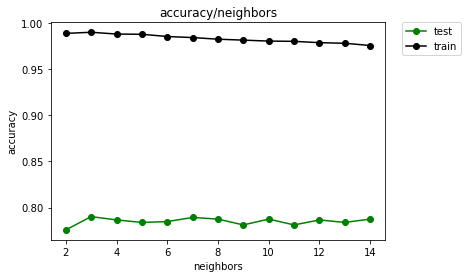

In [95]:
import matplotlib.pyplot as plt
x = accuracy_neighbor_train.keys()
y1 = accuracy_neighbor_test.values()
y2 = accuracy_neighbor_train.values()

plt.title("accuracy/neighbors")
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.plot(x,y1, c = "g", marker = "o",label="test")
plt.plot(x,y2, c = "k", marker = "o",label="train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
time.sleep(0.3)

In [98]:
accuracy_neighbor_test.values()

dict_values([0.7758775877587759, 0.7902790279027903, 0.7866786678667866, 0.783978397839784, 0.7848784878487849, 0.7893789378937894, 0.7875787578757876, 0.7812781278127813, 0.7875787578757876, 0.7812781278127813, 0.7866786678667866, 0.783978397839784, 0.7875787578757876])

In [99]:
accuracy_neighbor_test.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])